# 機械学習最終レポート 課題コード

In [1]:
# requirements
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# Datasets

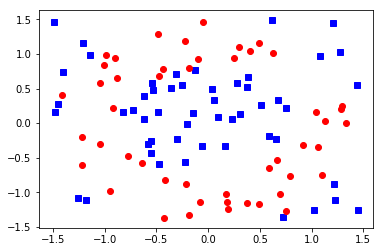

In [2]:
# dataset 1
np.random.seed(123)
n = 100
x_d1 = 3 * (np.random.rand(n, 2)-0.5)
radius = x_d1[:,0]**2 + x_d1[:,1]**2
y_d1 = (radius > 0.7 + 0.1 * np.random.randn(n)) &( radius < 2.2 + 0.1 * np.random.randn(n))
y_d1 = 2 * y_d1 -1

plt.plot(x_d1[y_d1 < 0, 0],  x_d1[y_d1 < 0, 1], 'bs')
plt.plot(x_d1[y_d1 > 0, 0],  x_d1[y_d1 > 0, 1], 'ro')

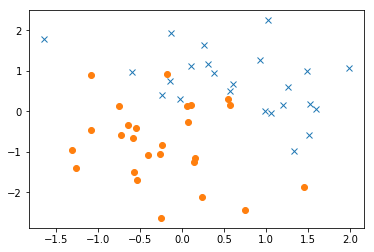

In [3]:
# dataset 2
n = 50
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x_d2 = np.random.randn(n, 2) + 0
y_d2 = 2 * (omega * x_d2[:,0] + x_d2[:,1] + noise > 0) - 1

plt.plot(np.extract(y_d2>0,x_d2[:,0]),np.extract(y_d2>0,x_d2[:,1]), 'x')
plt.plot(np.extract(y_d2<0,x_d2[:,0]),np.extract(y_d2<0,x_d2[:,1]), 'o')

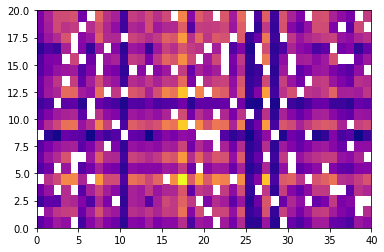

In [4]:
#dataset3
np.random.seed(1234)
m = 20
n = 40
r = 2
A = np.dot(np.random.rand(m, r), np.random.rand(r, n)).flatten()
ninc = 100
Q = np.random.permutation(m * n)[:ninc]
A[Q] = None
A = A.reshape(m, n)

plt.pcolor(A, cmap=plt.cm.plasma)

In [5]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

In [6]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)

In [7]:
# dataset 6
d_d6 = 200
n_d6 = 180

# we consider 5 groups where each group has 40 attributes
groupSize = 5
attrSize = 40
g_d6 = np.arange(groupSize*attrSize).reshape(groupSize,-1)

x_d6 = np.random.randn(n_d6, d_d6)
noise_d6 = 0.5

# we consider feature in group 1 and group 2 is activated.
w_d6 = np.vstack([20 * np.random.randn(80, 1),
                 np.zeros((120, 1)),
                 5 * np.random.rand()])
x_d6_tilde = np.hstack([x_d6, np.ones((n_d6, 1))])
y_d6 = np.dot(x_d6_tilde, w_d6) + noise_d6 * np.random.randn(n_d6, 1)

# Problem 1

In [8]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy
import copy

In [17]:
lambda_ = 100

#データセット
inputData = copy.deepcopy(x_d4)
outputData = copy.deepcopy(y_d4)

#パラメータの次元数
dim = len(inputData[0])

#学習率
eta = 0.001
#更新回数
updateNum = 100

def J(y, x, w):
    sumTemp = 0.0
    for i in range(len(y)):
        sumTemp += np.log(1.0 + np.exp(-y[i] * np.dot(w.T, x[i])))

    return sumTemp + lambda_ * np.dot(w.T, w)

#Jの勾配
def gradJ(y, x, w):
    sumTemp = np.zeros(dim)
    for i in range(len(y)):
        temp = np.exp(-y[i] * np.dot(w.T, x[i]))
        sumTemp += (-y[i] * temp * x[i]) / (1.0 + temp)
    
    return sumTemp + 2.0 * lambda_ * w

#Jのヘッセ行列
def HofJ(y, x, w):
    sumTemp = np.zeros((dim, dim))
    for i in range(len(y)):
        temp = np.exp(-y[i] * np.dot(w.T, x[i]))
        sumTemp += (temp / (1.0 + temp)**2) * np.dot(x[i], x[i].T)
        
    return sumTemp + 2.0 * lambda_ * np.eye(dim)

## 1.

In [18]:
loss_hist_batch = [] # to store the history of loss J(w_t)

# implement batch steepest gradient method here
np.random.seed(1) #シードを固定        
w = np.random.randn(dim)

#最急降下法によるパラメータの更新
for iterNum in range(updateNum):
    w = w - eta * gradJ(outputData, inputData, w)
    loss_hist_batch.append(J(outputData, inputData, w))

## 2.

In [19]:
loss_hist_newton = [] # to store the history of loss J(w_t)

# implement Newton based method here
np.random.seed(1) #シードを固定
w_newton = np.random.randn(dim)

#ニュートン法によるパラメータの更新
for iterNum in range(updateNum):
    w_newton = w_newton - np.dot(np.linalg.inv(HofJ(outputData, inputData, w_newton)), gradJ(outputData, inputData, w_newton))
    loss_hist_newton.append(J(outputData, inputData, w_newton))

## 3.

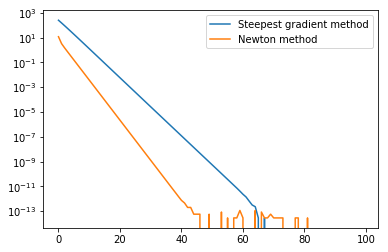

In [20]:
# plot the result
plt.plot(loss_hist_batch - J(outputData, inputData, w), label='Steepest gradient method')
plt.plot(loss_hist_newton - J(outputData, inputData, w_newton), label='Newton method')
plt.legend()
plt.yscale('log')

## 4.

In [22]:
lambda_ = 100

#データセット
inputData = copy.deepcopy(x_d5)
outputData = copy.deepcopy(y_d5)

#パラメータの次元数
dim = len(inputData[0])
#学習率
eta = 0.001
#更新回数
updateNum = 100

In [23]:
loss_hist_batch = [] # to store the history of loss J(w_t)

# implement batch steepest gradient method here
np.random.seed(1) #シードを固定        
w = np.random.randn(dim)

#最急降下法によるパラメータの更新
for iterNum in range(updateNum):
    w = w - eta * gradJ(outputData, inputData, w)
    loss_hist_batch.append(J(outputData, inputData, w))

In [24]:
loss_hist_newton = [] # to store the history of loss J(w_t)

# implement Newton based method here
np.random.seed(1) #シードを固定
w_newton = np.random.randn(dim)

#ニュートン法によるパラメータの更新
for iterNum in range(updateNum):
    w_newton = w_newton - np.dot(np.linalg.inv(HofJ(outputData, inputData, w_newton)), gradJ(outputData, inputData, w_newton))
    loss_hist_newton.append(J(outputData, inputData, w_newton))

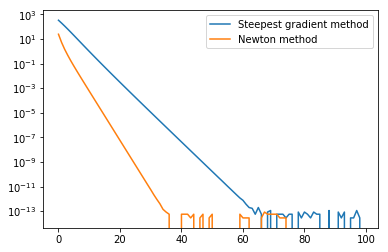

In [25]:
# plot the result
plt.plot(loss_hist_batch - J(outputData, inputData, w), label='Steepest gradient method')
plt.plot(loss_hist_newton - J(outputData, inputData, w_newton), label='Newton method')
plt.legend()
plt.yscale('log')